#Import

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import graphviz
import pydot
from sklearn.preprocessing import StandardScaler

#Load DataSet

In [ ]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Supervised Learning

## Linear Regression

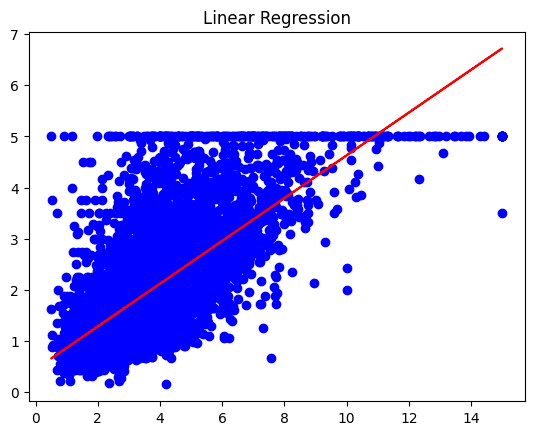

In [ ]:
X_boston, y_boston = datasets.fetch_california_housing(return_X_y=True)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boston, y_boston, test_size=0.3, random_state=42)
linear_regressor = LinearRegression() # Train the Linear Regression
linear_regressor.fit(X_train_b[:, :1], y_train_b) # Train the Linear Regression
y_pred_b = linear_regressor.predict(X_test_b[:, :1]) # Make predictions

# Visualization
plt.scatter(X_test_b[:, 0], y_test_b, color='blue')
plt.plot(X_test_b[:, 0], y_pred_b, color='red')
plt.title("Linear Regression")
plt.show()

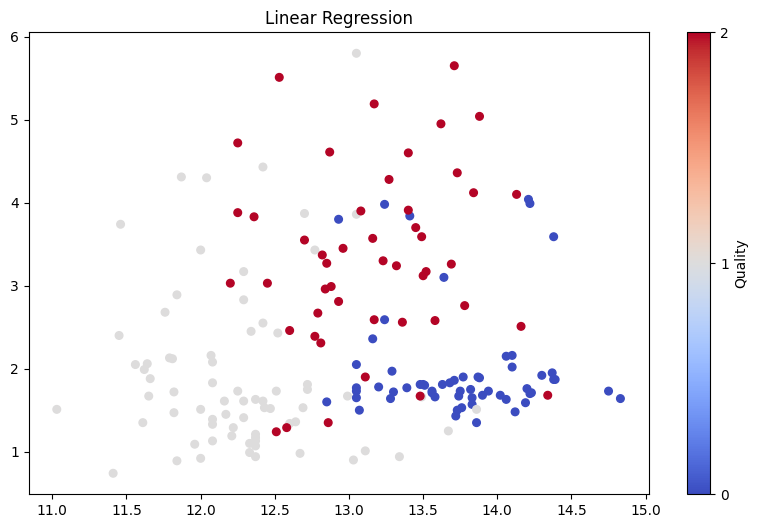

In [ ]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], c=wine_df['target'], cmap='coolwarm', s=30)


"""

use data visualization notebook:

set the title to "Wine Quality Dataset"
set the xlabel to "Alcohol"
set the ylabel to "Malic Acid"


"""
plt.title("Linear Regression")
plt.colorbar(ticks=np.unique(y), label='Quality')
plt.show()



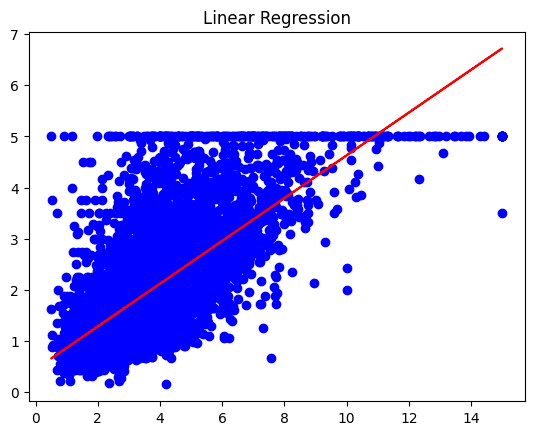

In [ ]:
X_boston, y_boston = datasets.fetch_california_housing(return_X_y=True)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boston, y_boston, test_size=0.3, random_state=42)
linear_regressor = LinearRegression() # Train the Linear Regression
linear_regressor.fit(X_train_b[:, :1], y_train_b) # Train the Linear Regression
y_pred_b = linear_regressor.predict(X_test_b[:, :1]) # Make predictions

# Visualization
plt.scatter(X_test_b[:, 0], y_test_b, color='blue')
plt.plot(X_test_b[:, 0], y_pred_b, color='red')
plt.title("Linear Regression")
plt.show()

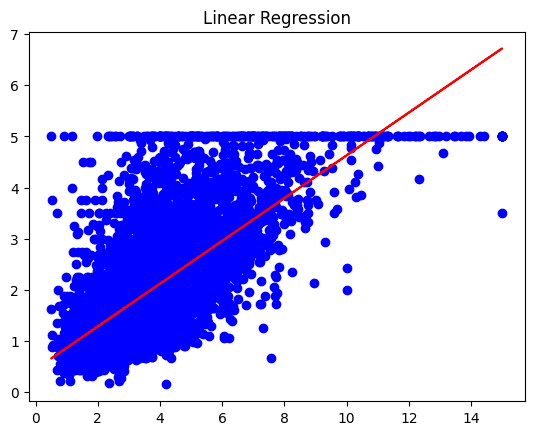

In [ ]:
X_boston, y_boston = datasets.fetch_california_housing(return_X_y=True)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boston, y_boston, test_size=0.3, random_state=42)
linear_regressor = LinearRegression() # Train the Linear Regression
linear_regressor.fit(X_train_b[:, :1], y_train_b) # Train the Linear Regression
y_pred_b = linear_regressor.predict(X_test_b[:, :1]) # Make predictions

# Visualization
plt.scatter(X_test_b[:, 0], y_test_b, color='blue')
plt.plot(X_test_b[:, 0], y_pred_b, color='red')
plt.title("Linear Regression")
plt.show()

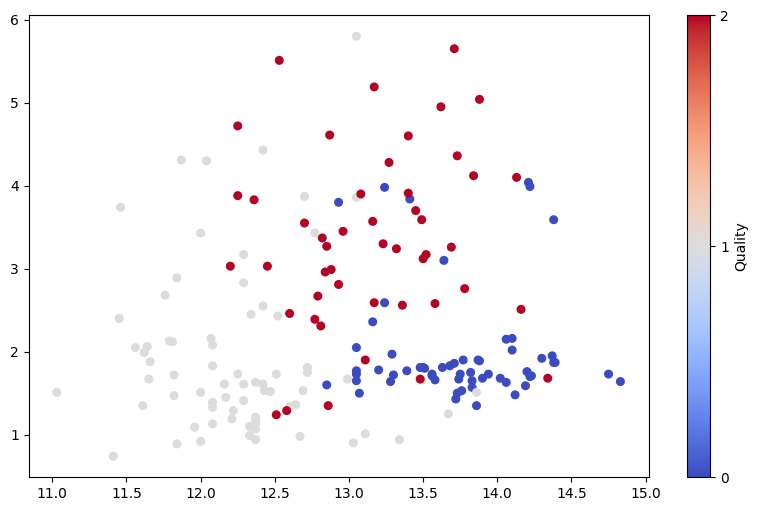

In [ ]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], c=wine_df['target'], cmap='coolwarm', s=30)


"""

use data visualization notebook:

set the title to "Wine Quality Dataset"
set the xlabel to "Alcohol"
set the ylabel to "Malic Acid"


"""

plt.colorbar(ticks=np.unique(y), label='Quality')
plt.show()


##Logistic Regression

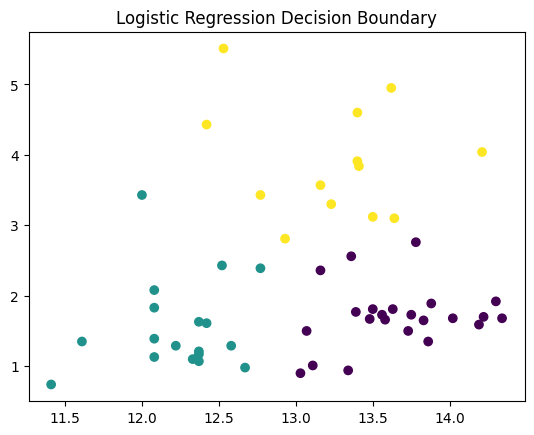

In [ ]:
log_regressor = LogisticRegression(max_iter=200) #Train the Logistic Regression
log_regressor.fit(X_train[:, :2], y_train) #Train the Logistic Regression
y_pred = log_regressor.predict(X_test[:, :2]) # Make predictions

# Visualization
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.title("Logistic Regression Decision Boundary")
plt.show()

##Decision Tree

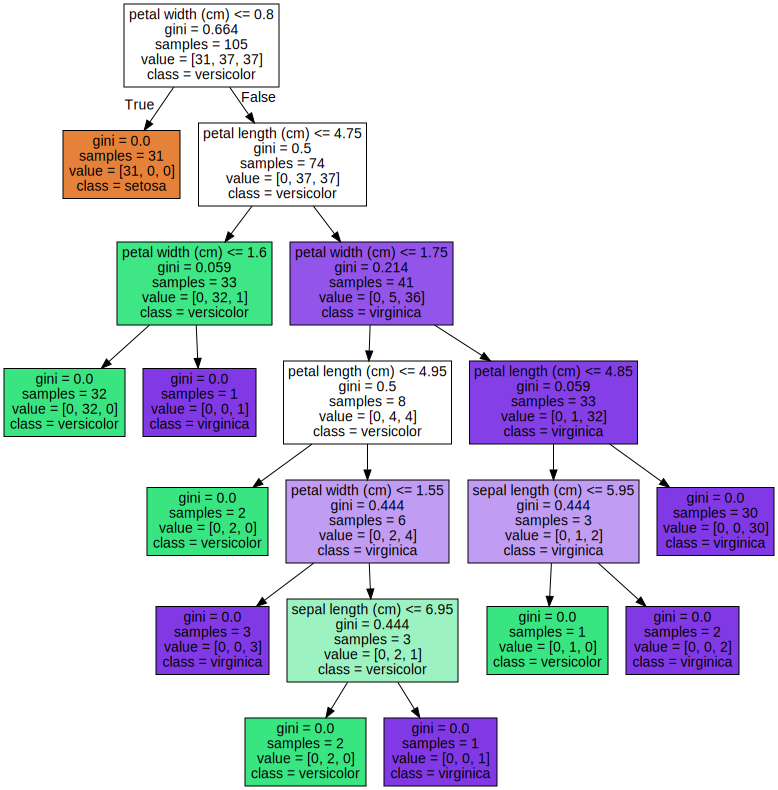

In [ ]:
tree = DecisionTreeClassifier() # Train the Decision Tree
tree.fit(X_train, y_train)  # Train the Decision Tree
y_pred = tree.predict(X_test) # Make predictions

# Visualization of decision tree
dot_data = export_graphviz(tree, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format="png")
graph

##Random Forest

In [ ]:
forest = RandomForestClassifier() # Train the Random Forest
forest.fit(X_train, y_train) # Train the Random Forest

# Visualization of feature importance
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(iris.feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

##Supervector Machine

In [ ]:

# Load the Iris dataset
iris = datasets.load_iris()
X2 = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
Y2 = iris.target

# Standardize features
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

# Train the SVM model for each class pair
def plot_iris_svm(X_train, X_test, y_train, y_test, class1, class2):
    # Create a binary target for the two classes
    y_train_binary = np.where(y_train == class1, 1, -1)
    y_test_binary = np.where(y_test == class1, 1, -1)
    y_test_binary[y_test == class2] = 0

    # Train SVM
    svm = SVC(kernel='linear')
    svm.fit(X_train[y_train_binary != 0], y_train_binary[y_train_binary != 0])  # Train with binary classes

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_binary, cmap='coolwarm', s=30, label='Train Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_binary, marker='x', cmap='coolwarm', s=50, label='Test Data')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))

    # Predict the function value for the whole grid
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(f"SVM Decision Boundary: Class {class1} vs Class {class2}")
    plt.xlabel(iris.feature_names[0])  # Sepal length
    plt.ylabel(iris.feature_names[1])  # Sepal width
    plt.legend()
    plt.show()

# Plot SVM decision boundaries for each pair of classes
classes = np.unique(Y2)
for i in range(len(classes)):
    for j in range(i + 1, len(classes)):
        plot_iris_svm(X_train, X_test, y_train, y_test, classes[i], classes[j])


##  Neural Network (MLP)

In [ ]:

mlp = MLPClassifier(max_iter=1000) # Train the MLP
mlp.fit(X_train, y_train) # Train the MLP

y_pred_mlp = mlp.predict(X_test) #Make Prediction
print("Accuracy (MLP):", accuracy_score(y_test, y_pred_mlp))

#  Unsupervised Learning

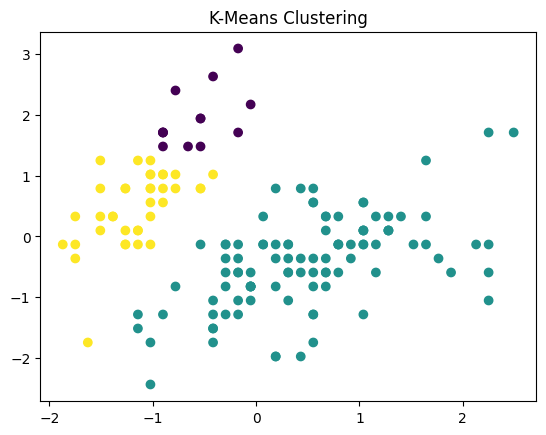

In [ ]:
## a) K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

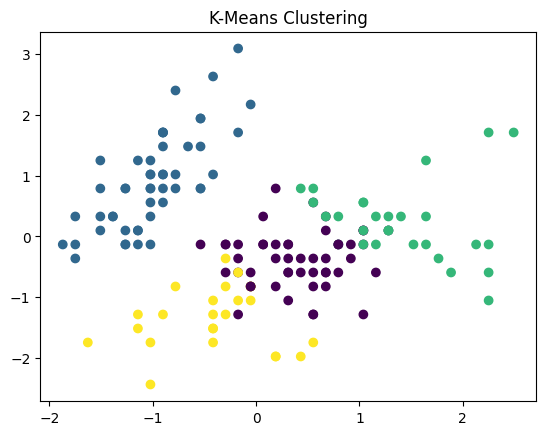

In [ ]:
## a) K-Means Clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

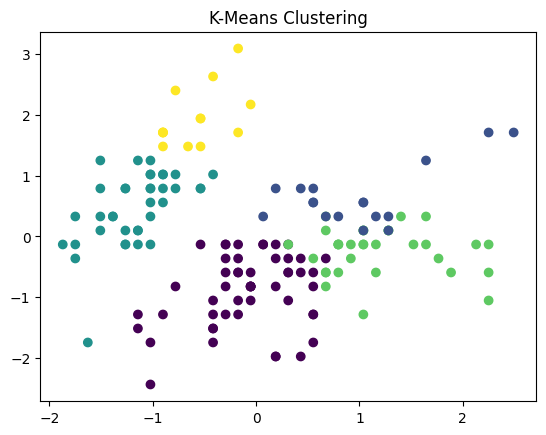

In [ ]:
## a) K-Means Clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

#HomeWork

### Introduction to the Wine Quality Dataset


In this exercise, we will explore the Wine Quality dataset, which contains information about various wine samples and their quality ratings. We will learn how to visualize the data and train a simple machine learning model to classify the quality of the wines based on their features.


## Load the Required Libraries


In the next cell, you will load the necessary libraries. Run the code below to import the libraries we need for our analysis.


In [ ]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


##Load the Wine Quality Dataset

##Load the Wine Quality Dataset
Now, we will load the Wine Quality dataset.


In [ ]:
# Load the Wine Quality dataset
wine = datasets.load_wine()
X = wine.data  # Features
y = wine.target  # Target variable (wine quality)

# Create a DataFrame for better visualization
wine_df = pd.DataFrame(X, columns=wine.feature_names)
wine_df['target'] = y

# Display the feature names
print("Feature names:", wine.feature_names)
# Display the first few rows of the dataset
wine_df.head()


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##Part1:Visualize the Data

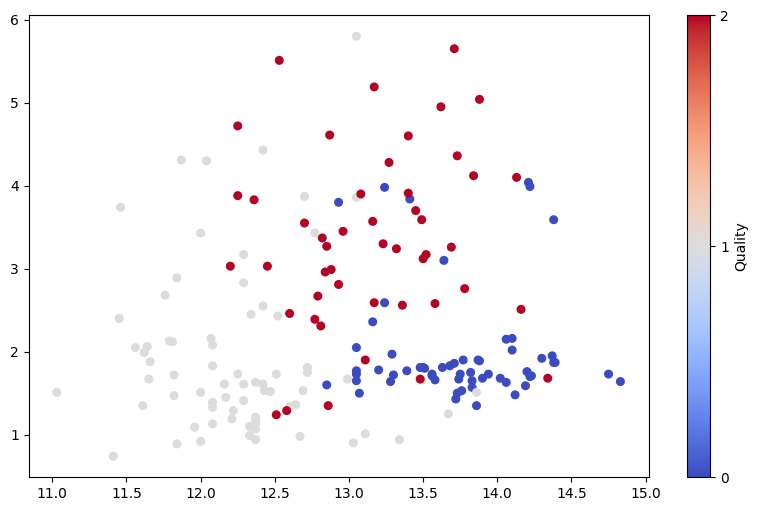

In [ ]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], c=wine_df['target'], cmap='coolwarm', s=30)


"""

use data visualization notebook:

set the title to "Wine Quality Dataset"
set the xlabel to "Alcohol"
set the ylabel to "Malic Acid"


"""

plt.colorbar(ticks=np.unique(y), label='Quality')
plt.show()


## Standardize the Features


Before training our model, we need to standardize the features. Run the code below to standardize the features.

In [ ]:
# Standardize features
scaler = StandardScaler()
X2 = scaler.fit_transform(X)  # Standardize features

## Part2: Split the Data



In [ ]:
"""

Now you should split the dataset into training and testing sets.
you can find an example in Load DataSet cell

X_train, X_test, y_train, y_test = ???

"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Part 3 : create a Decision Tree and a Logistic Regression model to classify the wine quality. We will print the accuracy for each model. The code for SVM will serve as an example, and you should complete the code for Decision Tree and Logistic Regression accordingly.

###SVM

#### Train the SVM Model

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

####make prediction

In [ ]:
y_pred = svm.predict(X_test)

#### Evaluate the Model



Now that we have trained our model, we can evaluate its performance on the test set. Run the code below to make predictions and calculate the accuracy.

In [ ]:
# Make predictions and calculate accuracy
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy of the SVM model: {accuracy:.2f}")


Accuracy of the SVM model: 0.98


### Decision Tree model

Accuracy of the Decision Tree model: 0.94


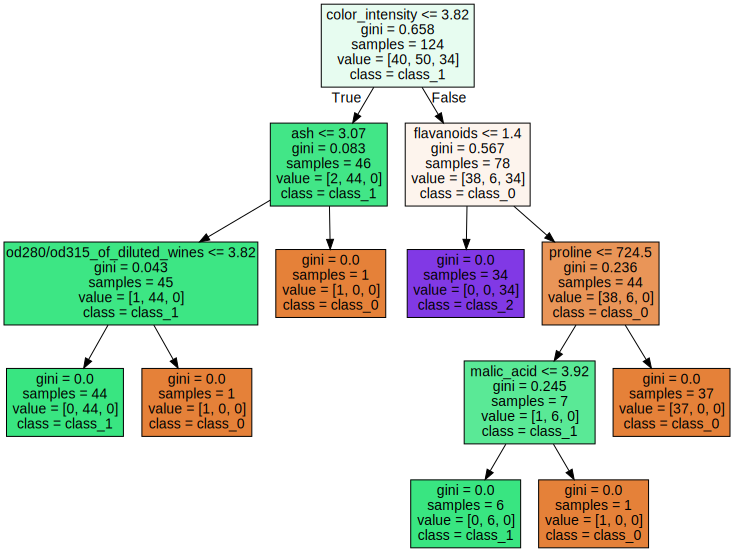

In [ ]:
""" Train the Decision Tree model


"""

tree = DecisionTreeClassifier() # Train the Decision Tree
tree.fit(X_train, y_train)  # Train the Decision Tree

"""

 Make predictions

"""


y_pred = tree.predict(X_test) # Make predictions

""" Evaluate the model


"""
# Visualization of decision tree


accuracy= accuracy_score(y_test,y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")
dot_data = export_graphviz(tree, out_file=None, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("wine_decision_tree", format="png")
graph


###Logistic Regression

Accuracy of the Decision Tree model: 0.96


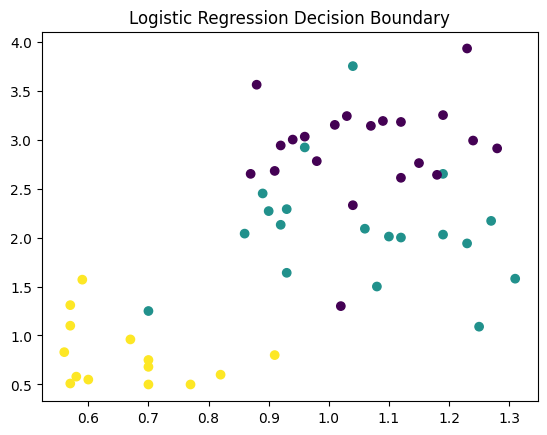

In [ ]:

""" Train the Decision Tree model


"""

log_regressor = LogisticRegression(max_iter=2000000) #Train the Logistic Regression
log_regressor.fit(X_train[:, :10], y_train) #Train the Logistic Regression

"""

 Make predictions

"""


y_pred = log_regressor.predict(X_test[:, :10]) # Make predictions

""" Evaluate the model


"""

# Visualization
accuracy= accuracy_score(y_test,y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

plt.scatter(X_test[:, 10], X_test[:, 6], c=y_pred, cmap='viridis')
plt.title("Logistic Regression Decision Boundary")
plt.show()


